In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import os
import mlflow
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
os.environ["MLFLOW_TRACKING_URI"]="sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/mlflow.db"
os.environ["MLFLOW_EXPERIMENT_NAME"]="my-new-experiment"

In [4]:
%env MLFLOW_TRACKING_URI=sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/mlflow.db
%env MLFLOW_EXPERIMENT_NAME=my-new-experiment

env: MLFLOW_TRACKING_URI=sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/02_experiment-tracking/mlflow.db
env: MLFLOW_EXPERIMENT_NAME=my-new-experiment


In [11]:
import mlflow 

mlflow.set_tracking_uri("sqlite:////home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/04_deployment/web-service-mlflow/mlflow.db")
mlflow.set_experiment("deployment_experiment")

<Experiment: artifact_location='/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/04_deployment/web-service-mlflow/mlruns/1', creation_time=1718293289067, experiment_id='1', last_update_time=1718293289067, lifecycle_stage='active', name='deployment_experiment', tags={}>

In [3]:
filename="/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet"

In [4]:
df=pd.read_parquet("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")

In [ ]:
# df=pd.read_parquet("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")

# df['duration']= df.lpep_dropoff_datetime-df.lpep_pickup_datetime

# df.duration=df["duration"].apply(lambda td: td.total_seconds()/60)

# df=df[(df.duration >=1 ) & (df.duration <=60 )]

# categorical=['PULocationID','DOLocationID']

# df[categorical]=df[categorical].astype('str')




In [4]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


In [5]:
df.shape

(68211, 20)

In [6]:
df.trip_type.nunique()

2

In [7]:
df.shape

(68211, 20)

In [8]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [9]:
df['duration']= df.lpep_dropoff_datetime-df.lpep_pickup_datetime

In [10]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58


In [11]:
df.duration=df["duration"].apply(lambda td: td.total_seconds()/60)

In [12]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667


In [48]:
# df=df[df.trip_type==2]

In [13]:
df.duration.describe()

count    68211.000000
mean        18.097271
std         74.925631
min          0.000000
25%          7.216667
50%         11.400000
75%         17.483333
max       1439.883333
Name: duration, dtype: float64

In [14]:
df=df[(df.duration >=1 ) & (df.duration <=60 )]

In [53]:
df.DOLocationID.nunique()

248

In [54]:
df.PULocationID.nunique()

219

In [52]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN,13.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN,8.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN,16.000000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN,18.000000


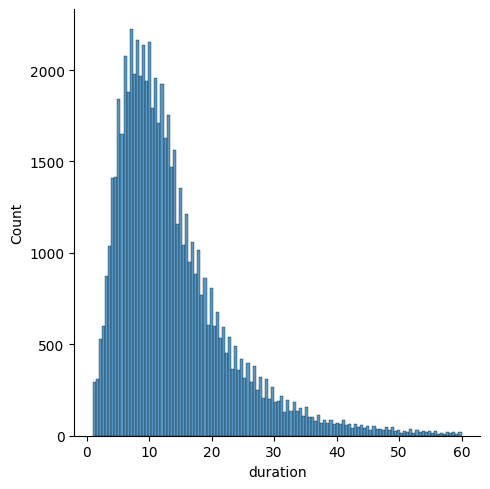

In [55]:
sns.displot(df.duration)

In [56]:
categorical=['PULocationID','DOLocationID'] # variables which we will be using 
numerical=['trip_distance']

In [59]:
df[categorical]=df[categorical].astype('str')

In [60]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN,13.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN,8.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN,16.000000
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN,18.000000


In [63]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '166', 'DOLocationID': '143', 'trip_distance': 2.58},
 {'PULocationID': '24', 'DOLocationID': '43', 'trip_distance': 1.81},
 {'PULocationID': '223', 'DOLocationID': '179', 'trip_distance': 0.0},
 {'PULocationID': '41', 'DOLocationID': '238', 'trip_distance': 1.3},
 {'PULocationID': '41', 'DOLocationID': '74', 'trip_distance': 1.1},
 {'PULocationID': '41', 'DOLocationID': '262', 'trip_distance': 2.78},
 {'PULocationID': '181', 'DOLocationID': '45', 'trip_distance': 3.8},
 {'PULocationID': '24', 'DOLocationID': '75', 'trip_distance': 1.88},
 {'PULocationID': '41', 'DOLocationID': '166', 'trip_distance': 1.11},
 {'PULocationID': '24', 'DOLocationID': '140', 'trip_distance': 4.22}]

In [64]:
train_dicts=df[categorical + numerical].to_dict(orient='records')

In [66]:
dv = DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [74]:
X_train

<65946x468 sparse matrix of type '<class 'numpy.float64'>'
	with 197838 stored elements in Compressed Sparse Row format>

In [71]:
# dv.feature_names_

In [72]:
dv?

Type:        DictVectorizer
String form: DictVectorizer()
File:        ~/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/feature_extraction/_dict_vectorizer.py
Docstring:  
Transforms lists of feature-value mappings to vectors.

This transformer turns lists of mappings (dict-like objects) of feature
names to feature values into Numpy arrays or scipy.sparse matrices for use
with scikit-learn estimators.

When feature values are strings, this transformer will do a binary one-hot
(aka one-of-K) coding: one boolean-valued feature is constructed for each
of the possible string values that the feature can take on. For instance,
a feature "f" that can take on the values "ham" and "spam" will become two
features in the output, one signifying "f=ham", the other "f=spam".

If a feature value is a sequence or set of strings, this transformer
will iterate over the values and will count the occurrences of each string
value.

However, note that this transformer will only do a binary one-hot

In [78]:
target = 'duration'
y_train=df[target].values

In [79]:
y_train

array([11.01666667,  6.76666667,  6.33333333, ..., 16.        ,
       18.        , 16.        ])

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
y_predict=lr.predict(X_train)

/tmp/ipykernel_34503/1823862663.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='actual')
/tmp/ipykernel_34503/1823862663.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict,label="prediction")


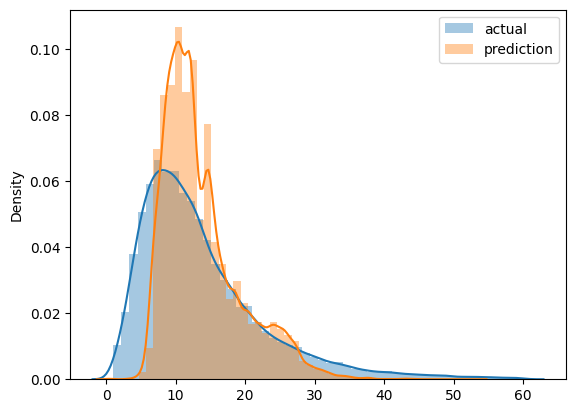

In [85]:
sns.distplot(y_train,label='actual')
sns.distplot(y_predict,label="prediction")
plt.legend()


In [87]:
mean_squared_error(y_train,y_predict,squared=False)

/home/kaustubh/mlops_zoomcamp/mlop/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.0590084265594495

In [3]:
def read_dataframe(filename):
    df=pd.read_parquet(filename)

    df['duration']= df.lpep_dropoff_datetime-df.lpep_pickup_datetime

    df.duration=df["duration"].apply(lambda td: td.total_seconds()/60)

    df=df[(df.duration >=1 ) & (df.duration <=60 )]

    categorical=['PULocationID','DOLocationID']

    df[categorical]=df[categorical].astype('str')

    return df

def prepare_dictonaries(df:pd.DataFrame):
    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
    categorical = ['PU_DO']
    numerical = ['trip_distance']
    dicts = df[categorical + numerical ].to_dict(orient='records')
    return dicts


In [4]:
filename="/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet"

In [5]:
df_train = read_dataframe(filename)
df_val = read_dataframe("/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-02.parquet")

In [6]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [7]:
dict_train = prepare_dictonaries(df_train)
dict_val = prepare_dictonaries(df_val)

NameError: name 'params' is not defined

In [12]:
with mlflow.start_run():
    params = dict(max_depth=20,n_estimators=100,min_samples_leaf=10,random_state=0)
    mlflow.log_params(params)

    pipeline = make_pipeline(
    DictVectorizer(),
    RandomForestRegressor(**params,n_jobs=-1)
    )

    pipeline.fit(dict_train,y_train)
    y_pred = pipeline.predict(dict_val)

    rmse = mean_squared_error(y_pred,y_val,squared=False)
    print(params,rmse)
    mlflow.log_metric('rmse',rmse)
    mlflow.sklearn.log_model(pipeline,artifact_path='model')



/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'max_depth': 20, 'n_estimators': 100, 'min_samples_leaf': 10, 'random_state': 0} 5.39920274232368


In [6]:
df_train['PU_DO']= df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO']= df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [7]:
categorical= ['PU_DO']     #['PULocationID','DOLocationID'] # variables which we will be using 
numerical=['trip_distance']

dv = DictVectorizer()

train_dicts=df_train[categorical + numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)


In [11]:
with open("models/vectorizer.bin","wb") as f_in:
    pickle.dump(dv,f_in)

In [8]:
target = 'duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [10]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_predict=lr.predict(X_val)

mean_squared_error(y_val,y_predict,squared=False)

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6.037457085676871

In [11]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv,lr) , f_out)

In [14]:
with mlflow.start_run():

    mlflow.set_tag("developer", "kaustubh")

    mlflow.log_param("train-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")
    mlflow.log_param("valid-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-02.parquet")

    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    with open("models/lr_reg.bin","wb") as f_in:
        pickle.dump(lr,f_in)

    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)
    
    with open("models/lr_reg.bin","rb") as f_out:
        lr = pickle.load(f_out)

    with open("models/vectorizer.bin","rb") as f_out:
        dv = pickle.load(f_out)
    

    mlflow.log_artifact(local_path="models/lr_reg.bin",artifact_path="Artifacts")
    mlflow.log_artifact(local_path="models/vectorizer.bin",artifact_path="Artifacts")

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
with mlflow.start_run():
    
    mlflow.sklearn.autolog()
    mlflow.set_tag("developer", "kaustubh")

    # mlflow.log_param("train-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")
    # mlflow.log_param("valid-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-02.parquet")
  
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse",rmse)
    mlflow.log_artifact(local_path="models/vectorizer.bin")
    

2024/06/17 10:06:07 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
with mlflow.start_run():
    
    mlflow.sklearn.autolog()
    mlflow.set_tag("developer", "kaustubh")

    # mlflow.log_param("train-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")
    # mlflow.log_param("valid-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-02.parquet")
  
    
    alpha=0.0001
    lr = Lasso(alpha=alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse",rmse)
    

2024/05/16 17:02:17 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
with mlflow.start_run():
    
    mlflow.sklearn.autolog()
    mlflow.set_tag("developer", "kaustubh")

    # mlflow.log_param("train-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-01.parquet")
    # mlflow.log_param("valid-data-path", "/home/kaustubh/mlops_zoomcamp/Mlops-ZoomCamp/data/green_tripdata_2023-02.parquet")
  
    
    alpha=0.001
    lr = Ridge(alpha=alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse",rmse)
    

2024/05/16 17:04:21 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
import xgboost as xgb

In [15]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [16]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [18]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [20]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=4,
    trials=Trials()
)

  0%|          | 0/4 [00:00<?, ?trial/s, best loss=?]

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [09:37:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.20244                          
[1]	validation-rmse:6.15796                          
[2]	validation-rmse:5.69024                          
[3]	validation-rmse:5.48614                          
[4]	validation-rmse:5.39301                          
[5]	validation-rmse:5.32175                          
[6]	validation-rmse:5.30344                          
[7]	validation-rmse:5.29329                          
[8]	validation-rmse:5.28598                          
[9]	validation-rmse:5.27988                          
[10]	validation-rmse:5.27894                         
[11]	validation-rmse:5.27911                         
[12]	validation-rmse:5.27003                         
[13]	validation-rmse:5.26819                         
[14]	validation-rmse:5.26205                         
[15]	validation-rmse:5.26169                         
[16]	validation-rmse:5.25970                         
[17]	validation-rmse:5.26030                         
[18]	validation-rmse:5.25700

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [09:37:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.57975                                                   
[1]	validation-rmse:6.55202                                                   
[2]	validation-rmse:5.98541                                                   
[3]	validation-rmse:5.67018                                                   
[4]	validation-rmse:5.49227                                                   
[5]	validation-rmse:5.40435                                                   
[6]	validation-rmse:5.35217                                                   
[7]	validation-rmse:5.32124                                                   
[8]	validation-rmse:5.30386                                                   
[9]	validation-rmse:5.27838                                                   
[10]	validation-rmse:5.27165                                                  
[11]	validation-rmse:5.26404                                                  
[12]	validation-rmse:5.25971                        

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [09:37:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:5.32339                                                   
[1]	validation-rmse:5.29642                                                   
[2]	validation-rmse:5.29501                                                   
[3]	validation-rmse:5.28684                                                   
[4]	validation-rmse:5.28370                                                   
[5]	validation-rmse:5.27705                                                   
[6]	validation-rmse:5.26926                                                   
[7]	validation-rmse:5.25927                                                   
[8]	validation-rmse:5.25081                                                   
[9]	validation-rmse:5.24223                                                   
[10]	validation-rmse:5.23853                                                  
[11]	validation-rmse:5.22338                                                  
[12]	validation-rmse:5.22444                        

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [09:38:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.60570                                                   
[1]	validation-rmse:6.59604                                                   
[2]	validation-rmse:6.04384                                                   
[3]	validation-rmse:5.73791                                                   
[4]	validation-rmse:5.57214                                                   
[5]	validation-rmse:5.47849                                                   
[6]	validation-rmse:5.42007                                                   
[7]	validation-rmse:5.38935                                                   
[8]	validation-rmse:5.37030                                                   
[9]	validation-rmse:5.36304                                                   
[10]	validation-rmse:5.34534                                                  
[11]	validation-rmse:5.34054                                                  
[12]	validation-rmse:5.33650                        

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



In [25]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [21]:
params={
    "learning_rate":0.30391535367804895,
    "max_depth" :14,
    "min_child_weight": 1.7867610781866776,
    "objective":'reg:linear',
    "reg_alpha":0.11533706179065978,
    "reg_lambda":0.006501402286326798,
    "seed":42
}

In [23]:

mlflow.xgboost.autolog()

booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )

2024/05/16 09:59:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'de8e6c8765724657817eb70ea96a9999', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


[0]	validation-rmse:7.60570


/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [09:59:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:6.59604
[2]	validation-rmse:6.04384
[3]	validation-rmse:5.73791
[4]	validation-rmse:5.57214
[5]	validation-rmse:5.47849
[6]	validation-rmse:5.42007
[7]	validation-rmse:5.38935
[8]	validation-rmse:5.37030
[9]	validation-rmse:5.36304
[10]	validation-rmse:5.34534
[11]	validation-rmse:5.34054
[12]	validation-rmse:5.33650
[13]	validation-rmse:5.33486
[14]	validation-rmse:5.33264
[15]	validation-rmse:5.33153
[16]	validation-rmse:5.32877
[17]	validation-rmse:5.32681
[18]	validation-rmse:5.32493
[19]	validation-rmse:5.32115
[20]	validation-rmse:5.31679
[21]	validation-rmse:5.31482
[22]	validation-rmse:5.31266
[23]	validation-rmse:5.31255
[24]	validation-rmse:5.31018
[25]	validation-rmse:5.30820
[26]	validation-rmse:5.30656
[27]	validation-rmse:5.30432
[28]	validation-rmse:5.30324
[29]	validation-rmse:5.30101
[30]	validation-rmse:5.29913
[31]	validation-rmse:5.29612
[32]	validation-rmse:5.29457
[33]	validation-rmse:5.29296
[34]	validation-rmse:5.29215
[35]	validation-rmse:5.

2024/05/16 09:59:40 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2024/05/16 09:59:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [09:59:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


In [26]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [28]:
with mlflow.start_run():

    params={
        "learning_rate":0.30391535367804895,
        "max_depth" :14,
        "min_child_weight": 1.7867610781866776,
        "objective":'reg:linear',
        "reg_alpha":0.11533706179065978,
        "reg_lambda":0.006501402286326798,
        "seed":42
    }

    mlflow.xgboost.autolog(disable=True)
    mlflow.set_tag("developer","Kaustubh")
    mlflow.log_params(params)
    

    booster = xgb.train(
                params=params,
                dtrain=train,
                num_boost_round=1000,
                evals=[(valid, 'validation')],
                early_stopping_rounds=50
            )
    
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)
    
    with open('models/preprocess.b','wb') as f:
        pickle.dump(dv,f)
    
    mlflow.log_artifact("models/preprocess.b",artifact_path="preprocessor")

    mlflow.xgboost.log_model(booster,artifact_path="models_mlfow")
    
    

[0]	validation-rmse:7.60570


/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [11:22:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:6.59604
[2]	validation-rmse:6.04384
[3]	validation-rmse:5.73791
[4]	validation-rmse:5.57214
[5]	validation-rmse:5.47849
[6]	validation-rmse:5.42007
[7]	validation-rmse:5.38935
[8]	validation-rmse:5.37030
[9]	validation-rmse:5.36304
[10]	validation-rmse:5.34534
[11]	validation-rmse:5.34054
[12]	validation-rmse:5.33650
[13]	validation-rmse:5.33486
[14]	validation-rmse:5.33264
[15]	validation-rmse:5.33153
[16]	validation-rmse:5.32877
[17]	validation-rmse:5.32681
[18]	validation-rmse:5.32493
[19]	validation-rmse:5.32115
[20]	validation-rmse:5.31679
[21]	validation-rmse:5.31482
[22]	validation-rmse:5.31266
[23]	validation-rmse:5.31255
[24]	validation-rmse:5.31018
[25]	validation-rmse:5.30820
[26]	validation-rmse:5.30656
[27]	validation-rmse:5.30432
[28]	validation-rmse:5.30324
[29]	validation-rmse:5.30101
[30]	validation-rmse:5.29913
[31]	validation-rmse:5.29612
[32]	validation-rmse:5.29457
[33]	validation-rmse:5.29296
[34]	validation-rmse:5.29215
[35]	validation-rmse:5.

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [11:22:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Loading using python function

In [29]:
 
logged_model = 'runs:/8646743db6e44246bb07d9b3eb854abd/models_mlfow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
 

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [11:26:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [30]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlfow
  flavor: mlflow.xgboost
  run_id: 8646743db6e44246bb07d9b3eb854abd

Loading using xgboost

In [31]:
xgboost_model = mlflow.xgboost.load_model(logged_model)

/home/kaustubh/mlops_zoomcamp/mlops/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [11:42:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [32]:
xgboost_model

In [33]:
y_pred = xgboost_model.predict(valid)

In [34]:
y_pred[:10]

array([21.400887, 21.740734, 31.74698 , 18.762165, 14.128815, 12.878006,
       13.376674,  7.848484, 13.687711, 10.491603], dtype=float32)

In [1]:
import os
for name, value in os.environ.items():
    print(f"{name}: {value}")


SHELL: /bin/zsh
WSL2_GUI_APPS_ENABLED: 1
WSL_DISTRO_NAME: Arch
PKG_CONFIG_PATH: /home/kaustubh/gimp/lib64/pkgconfig:/home/kaustubh/gimp/share/pkgconfig:/home/kaustubh/gimp/lib/pkgconfig
ACLOCAL_FLAGS: -I /share/aclocal 
CGDB_DIR: /home/kaustubh/.config/cgdb
EDITOR: nvim
NAME: Code
PWD: /mnt/c/Users/Hp/AppData/Local/Programs/Microsoft VS Code
LOGNAME: kaustubh
FZF_DEFAULT_COMMAND: find -L
HOME: /home/kaustubh
LANG: en_US.UTF-8
WSL_INTEROP: /run/WSL/28235_interop
LF_ICONS: tw=:st=:ow=:dt=:di=:fi=:ln=:or=:ex=:*.c=:*.cc=:*.clj=:*.coffee=:*.cpp=:*.css=:*.d=:*.dart=:*.erl=:*.exs=:*.fs=:*.go=:*.h=:*.hh=:*.hpp=:*.hs=:*.html=:*.java=:*.jl=:*.js=:*.json=:*.lua=:*.md=:*.php=:*.pl=:*.pro=:*.py=:*.rb=:*.rs=:*.scala=:*.ts=:*.vim=:*.cmd=:*.ps1=:*.sh=:*.bash=:*.zsh=:*.fish=:*.tar=:*.tgz=:*.arc=:*.arj=:*.taz=:*.lha=:*.lz4=:*.lzh=:*.lzma=:*.tlz=:*.txz=:*.tzo=:*.t7z=:*.zip=:*.z=:*.dz=:*.gz=:*.lrz=:*.lz=:*.lzo=:*.xz=:*.zst=:*.tzst=:*.bz

In [19]:
import os

# # Set an environment variable
# os.environ['MY_VAR'] = 'some value'

# Remove the environment variable
del os.environ['MLFLOW_TRACKING_URI']

print(os.getenv('MLFLOW_TRACKING_URI'))  # Prints: None


None
